In [1]:
#import libs (copy& pastefrom EDA file))
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df2 = pd.read_csv('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/df1_understanding_the_data.csv')
df2.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,0.000,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     21597 non-null  float64
 11  view           21597 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21597 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   21597 non-null  float64
 18  zipcod

In [4]:
df2['date'] = pd.to_datetime(df2['date'])
#df2['yr_built'] = pd.to_datetime(df2['yr_built'])
df2['yr_renovated'] = (df2['yr_renovated'] // 10).astype(int)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   id.1           21597 non-null  int64         
 5   bedrooms       21597 non-null  float64       
 6   bathrooms      21597 non-null  float64       
 7   sqft_living    21597 non-null  float64       
 8   sqft_lot       21597 non-null  float64       
 9   floors         21597 non-null  float64       
 10  waterfront     21597 non-null  float64       
 11  view           21597 non-null  float64       
 12  condition      21597 non-null  int64         
 13  grade          21597 non-null  int64         
 14  sqft_above     21597 non-null  float64       
 15  sqft_basement  2159

In [6]:
df2['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [7]:
#check if condition equals to grade
df3 = df2[['condition', 'grade']]
df3.head()

,condition,grade
0,3,7
1,3,7
2,3,6
3,5,7
4,3,8


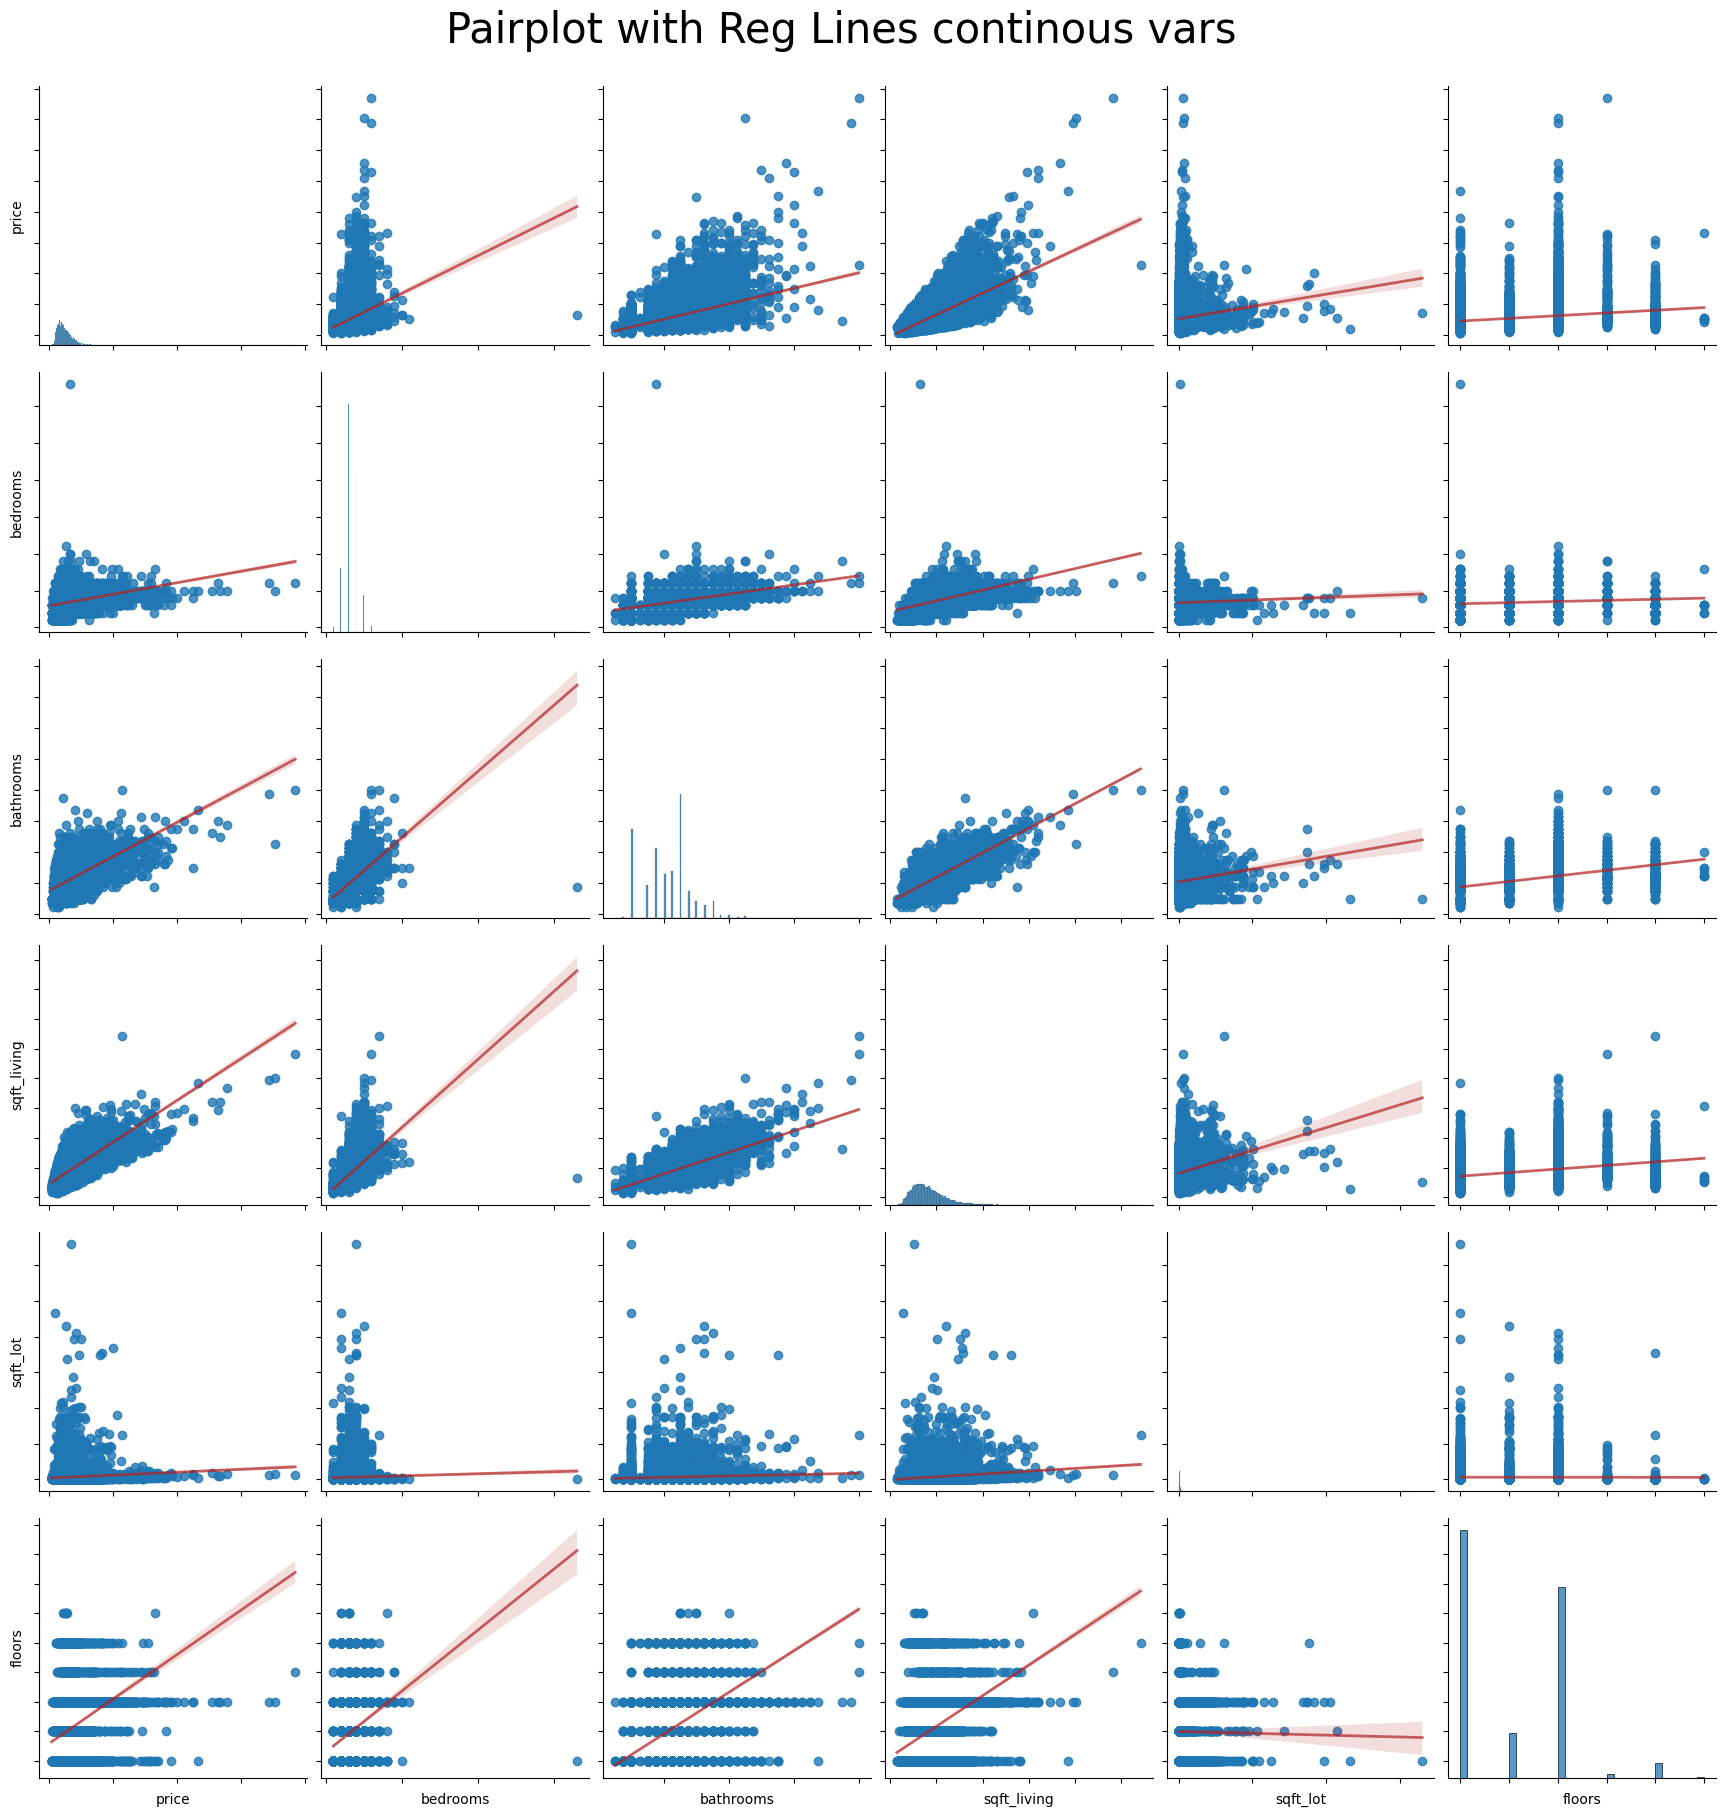

In [ ]:
#PAIRPLOT OF CONTINOUS VARS
pairplot_continous_vars = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
]
# FacetGrid in g
g = sns.pairplot( # FFacetGrid-Objekt abspeichern, damit man es später erneut verwenden kann zB. für die Achsenbenennung
    df2[pairplot_continous_vars],
    kind='reg',
    plot_kws={'line_kws': {'color': 'firebrick', 'linewidth': 2, 'alpha': 0.7}},
    height=3
)
for ax in g.axes.flatten():
    # Drehung und Schriftgröße der Tick-Labels anpassen
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=24)
plt.suptitle('Pairplot with Reg Lines continous vars', y=1.02, fontsize=30)
plt.show()

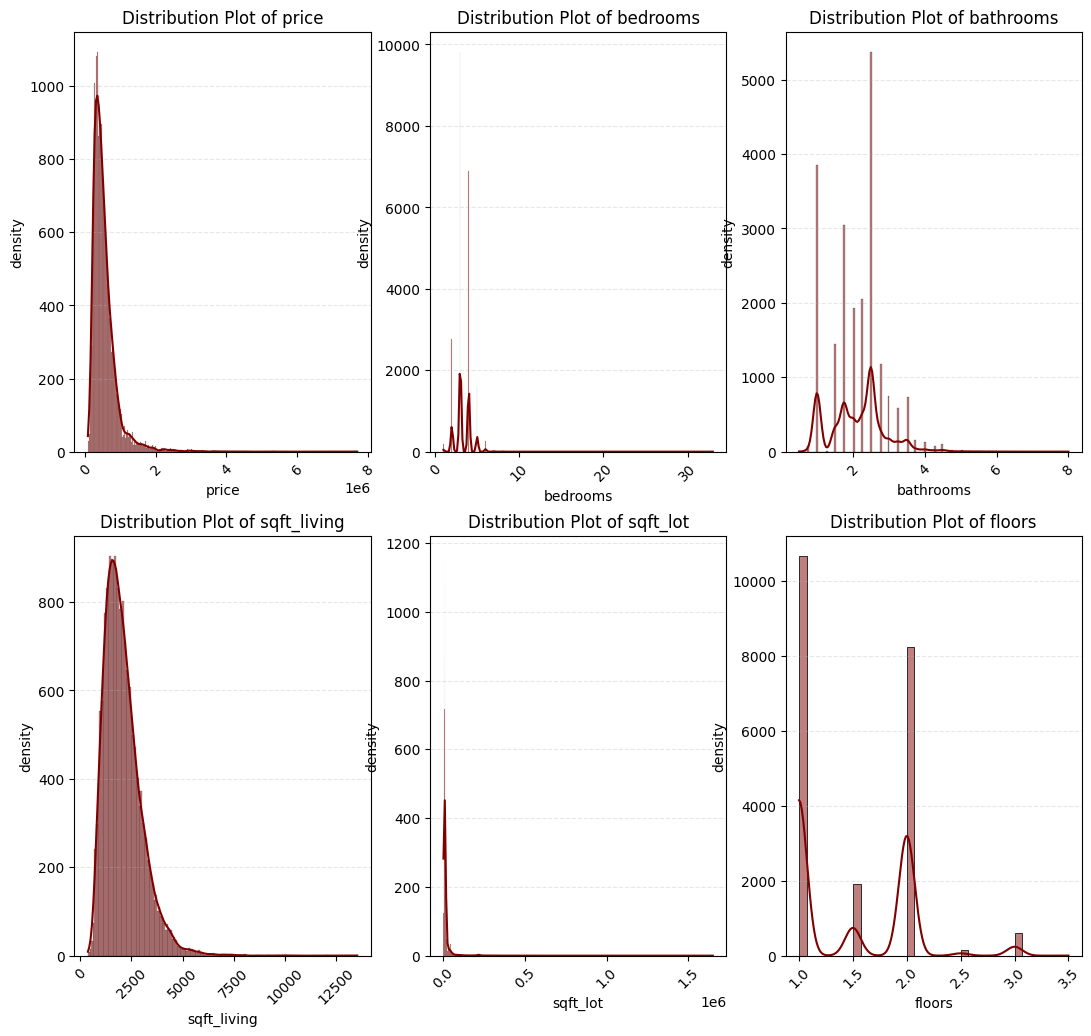

In [9]:
#HIST PLOT OF CONTINOUS VARS
continous_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'] #histoplots of continous vars

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 12))

for ax, column in zip(axes.flatten(), continous_vars):
    sns.histplot(x=column, data=df2, ax=ax, color='maroon', kde=True)
    ax.set_title(f'Distribution Plot of {column}')
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('density', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    #ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

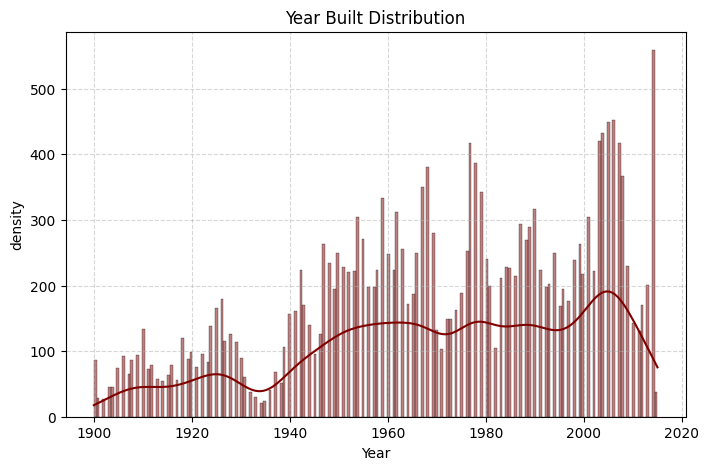

In [10]:
#HIST PLOT YEAR BUILT 
year_built_plot = sns.histplot(df2['yr_built'], bins=200, color='maroon', kde=True)
plt.title('Year Built Distribution')
plt.xlabel('Year')
plt.ylabel('density')
#suggested by copilot
#plt.xlim(0, 5_500_000) #plt.xlim(a, b) = Zeige die X-Achse von a bis b.
#plt.xticks(np.arange(0, 5_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical

plt.show()

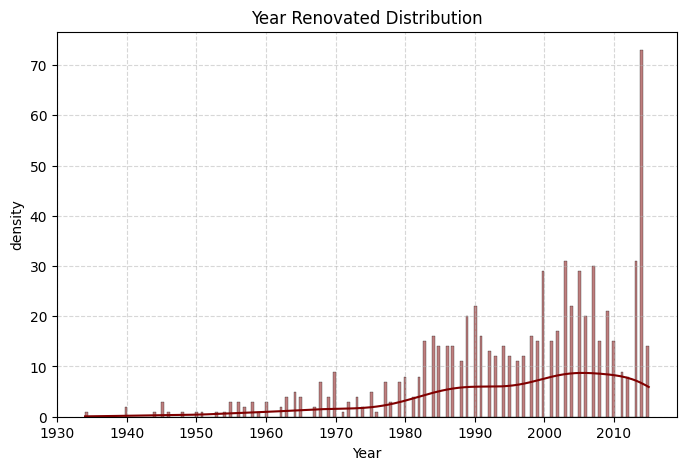

In [ ]:
#HIST PLOT YEAR RENOVATED
year_renovated_plot = sns.histplot(df2['yr_renovated' > 0 ], bins=200, color='maroon', kde=True)
plt.title('Year Renovated Distribution')
plt.xlabel('Year')
plt.ylabel('density')
#suggested by copilot
#plt.xlim(0, 5_500_000) #plt.xlim(a, b) = Zeige die X-Achse von a bis b.
#plt.xticks(np.arange(0, 5_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical

plt.show()

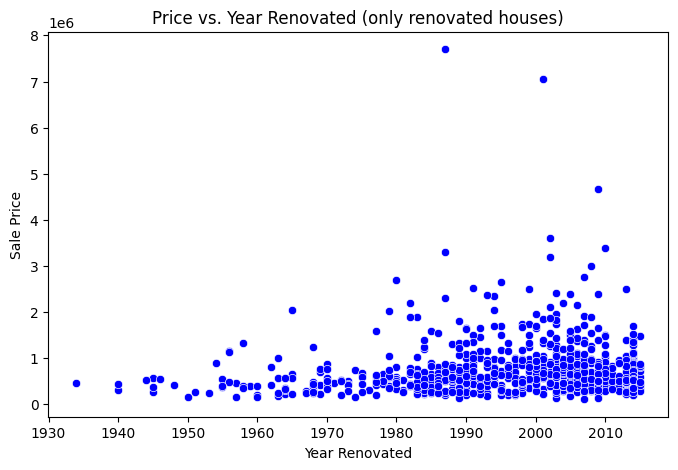

In [27]:
df_filtered = df2[df2['yr_renovated'] > 0]

# 2) Zeichne einen Scatterplot: 
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_filtered, 
    x='yr_renovated', 
    y='price', 
    color='blue'
)
plt.title("Price vs. Year Renovated (only renovated houses)")
plt.xlabel("Year Renovated")
plt.ylabel("Sale Price")
plt.show()

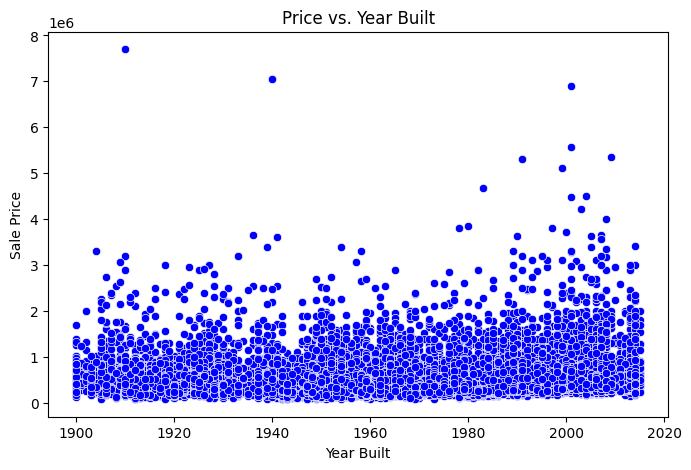

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df2, 
    x='yr_built', 
    y='price', 
    color='blue'
)
plt.title("Price vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

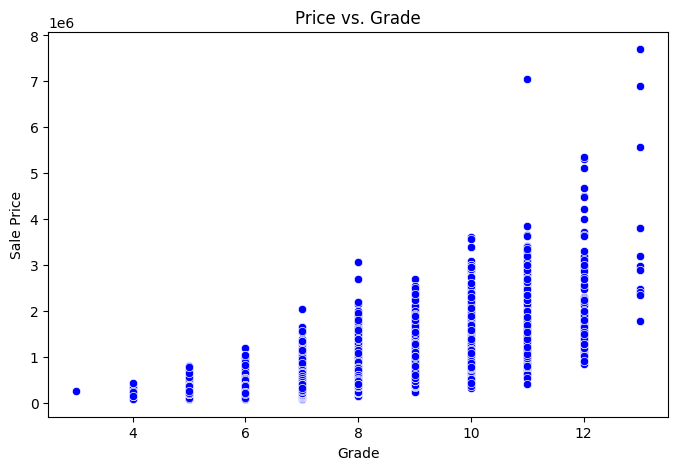

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df2, 
    x='grade', 
    y='price', 
    color='blue'
)
plt.title("Price vs. Grade")
plt.xlabel("Grade")
plt.ylabel("Sale Price")
plt.show()

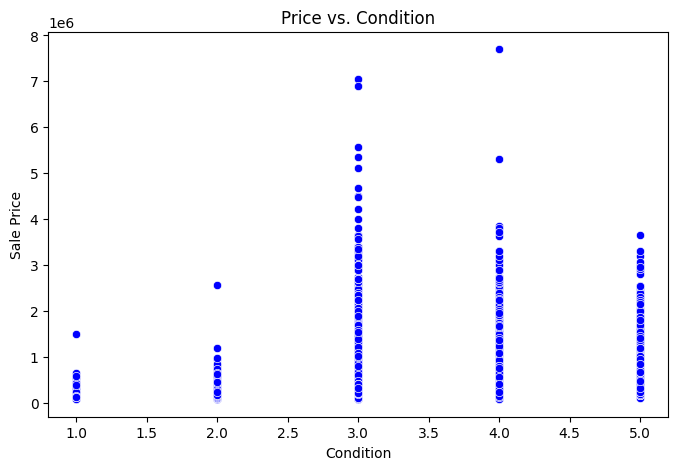

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df2, 
    x='condition', 
    y='price', 
    color='blue'
)
plt.title("Price vs. Condition")
plt.xlabel("Condition")
plt.ylabel("Sale Price")
plt.show()

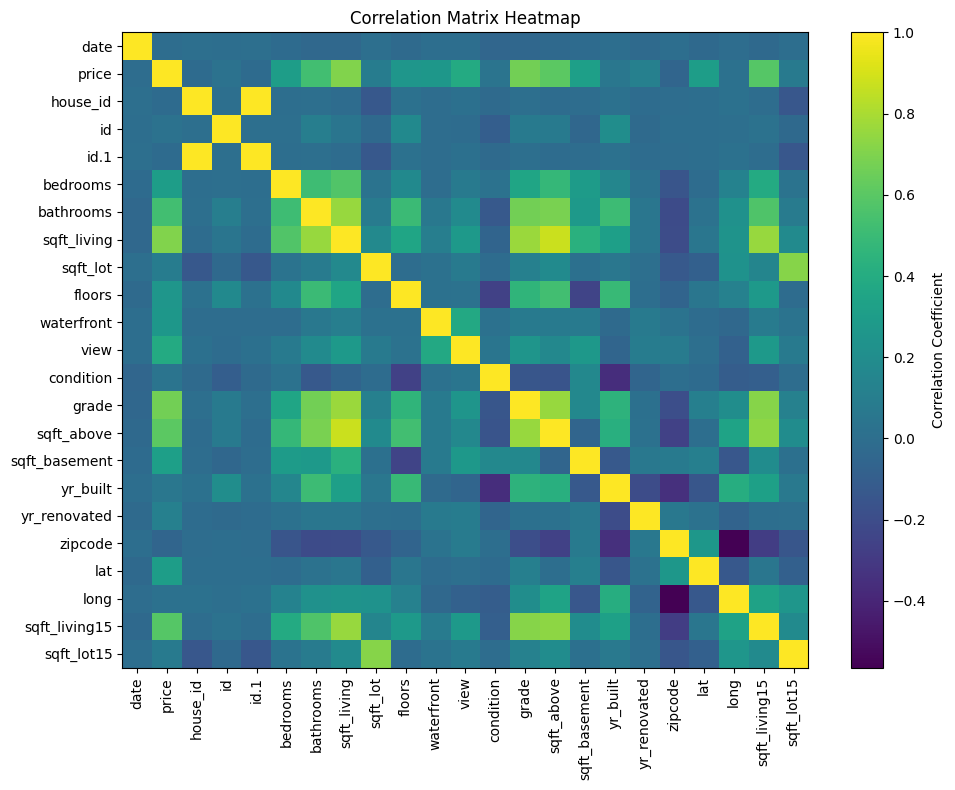

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel: DataFrame neu laden (anpassen, falls dein CSV andere Dateipfad/Variable ist)
# df2 = pd.read_csv('data/eda.csv')

# 1) Korrelationsmatrix berechnen
corr_matrix = df2.corr()

# 2) Heatmap zeichnen
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [21]:
sns.scatterplot(x = df2['yr_renovated' > 0 ], y = df2['price'], color='maroon')

TypeError: '>' not supported between instances of 'str' and 'int'

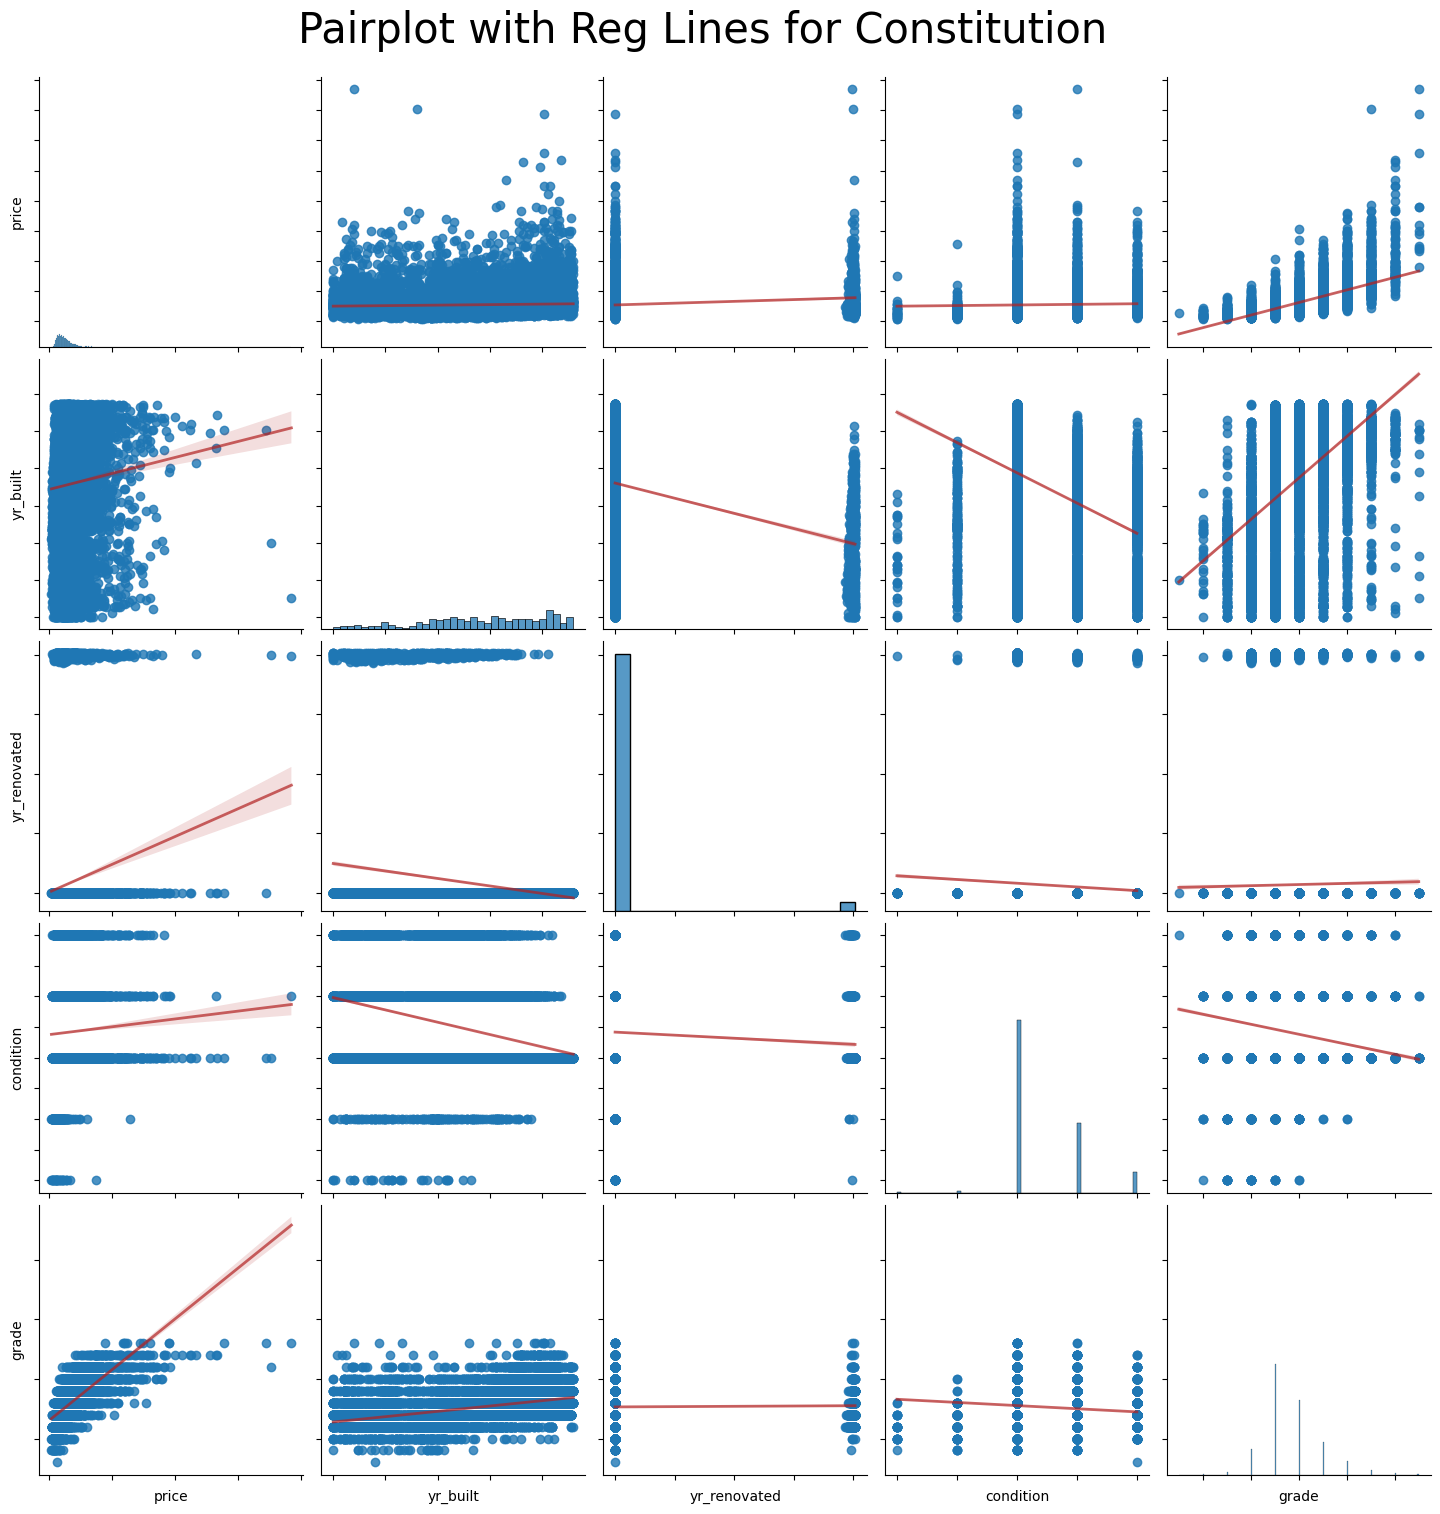

In [15]:
#PAIRPLOT OF price, condition, grade, year built year renovated
pairplot_constitution_vars = [
    'price', 'yr_built', 'yr_renovated', 'condition', 'grade'
]
# FacetGrid in g
pcv = sns.pairplot( # FFacetGrid-Objekt abspeichern, damit man es später erneut verwenden kann zB. für die Achsenbenennung
    df2[pairplot_constitution_vars],
    kind='reg',
    plot_kws={'line_kws': {'color': 'firebrick', 'linewidth': 2, 'alpha': 0.7}},
    height=3
)
for ax in pcv.axes.flatten():
    # Drehung und Schriftgröße der Tick-Labels anpassen
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=24)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=24)
plt.suptitle('Pairplot with Reg Lines for Constitution', y=1.02, fontsize=30)
plt.show()

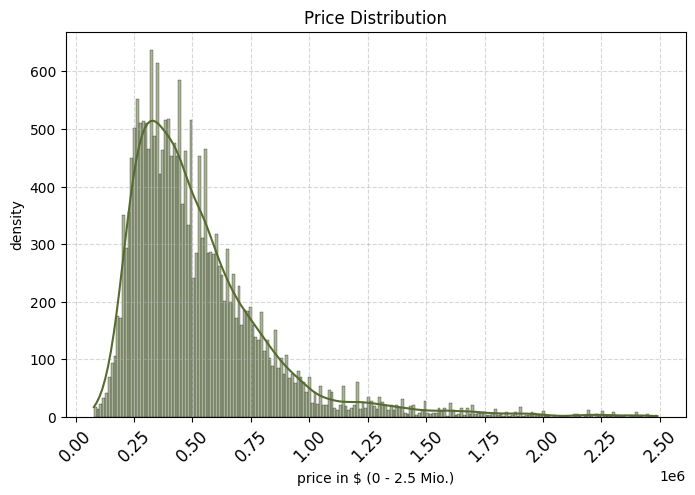

In [ ]:
#looking into price distribution; cutting outliers and focus on main part
df2 = df2[df2['price'] < 2_500_000] #cutting outliers
price_dist_plot = sns.histplot(df2['price'], bins=200, color='darkolivegreen', kde=True)
plt.title('Price Distribution')
plt.xlabel('price in $ (0 - 2.5 Mio.)')
plt.ylabel('density')
#suggested by copilot
#plt.xlim(0, 5_500_000)
plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show(price_dist_plot)

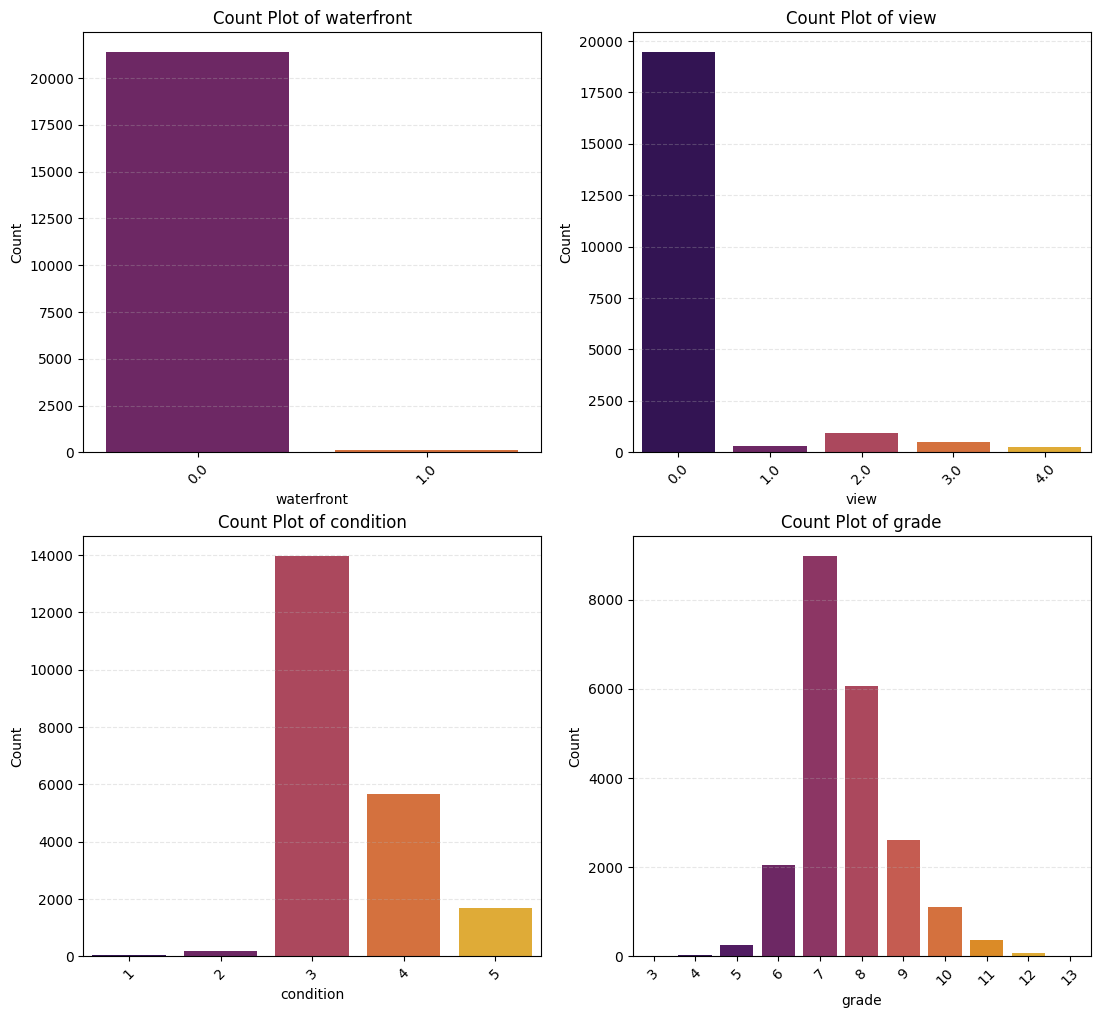

In [ ]:
categoric_vars = ['waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 12))

for ax, column in zip(axes.flatten(), categoric_vars):
    sns.countplot(x=column, data=df2, palette='inferno', ax=ax) #palette magma can be found in https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    #ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


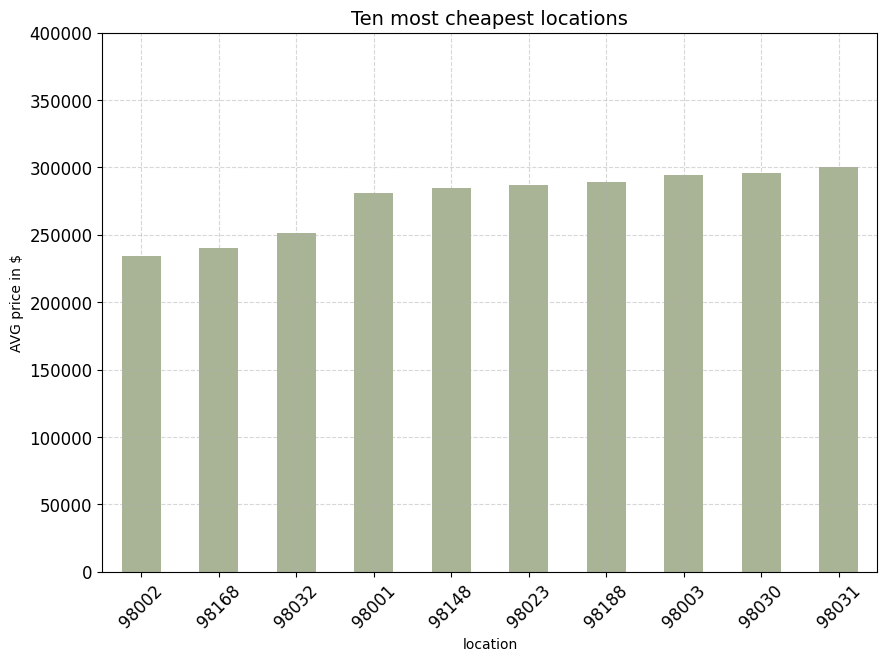

In [ ]:
#avg pro zip - CHEAPEST LOCATIONS ONE MORE TIME
mean_price_per_zp = df2.groupby('zipcode')['price'].mean()

#cheapest zips
cheapest10 = mean_price_per_zp.nsmallest(10)

#plotten
plt.figure(figsize=(10, 7))
cheapest10.plot(kind='bar', color='darkolivegreen', alpha=0.5)

#visuals
    #title
plt.title('Ten most cheapest locations', fontsize=14)
    #x-label
plt.xlabel('location')
plt.xticks(rotation=45, fontsize=12)
    #y-label
plt.ylabel('AVG price in $')
plt.yticks(np.arange(0, 400_001, 50_000), fontsize=12)
plt.ylim(0, 400_000)
    #backround
#plt.gca().set_facecolor('white', alpha=0.8) #here the background color is set to white with 80% opacity
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()